<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_1_4_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 1.4**
# **Principal Component Analysis**

Concepts covered:


*   1.4.1. Singular value decomposition
*   1.4.2. Low-rank matrix approximations
*   1.4.3. Principal component analysis








#   1.4.1. Singular value decomposition

In Singular Value Decomposition (SVD), we decompose a matrix $A$ into the form $A = U \Sigma V^T$, where $U$ and $V$ are orthogonal matrices, and $\Sigma$ is a diagonal matrix containing the singular values of $A$. The singular values $\sigma_i$ are the square roots of the eigenvalues of $A^T A$, and they represent the lengths of the vectors $A v_i$, where $v_i$ are the eigenvectors of $A^T A$. The columns of $U$ are called the left singular vectors, and the columns of $V$ are the right singular vectors. The number of non-zero singular values determines the rank of the matrix, which corresponds to the dimension of the column space of $A$.

Its important to note that SVD works for any $m \times n$ matrix since it  decomposes both square and non-square matrices, making it an extrmely useful tool for analyzing data of various dimensions. This adaptability is especially useful in applications like reducing dimensionality, the compression of images, and solving least-squares problems, where the matrices involved are typically not square.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Will manually implement SVD to demonstrate understanding of each step
def my_svd(A):
    # Step 1: compute A^T A, store it in a variable
    ATA = A.T @ A

    # Step 2: get eigenvalue decomposition of A^T A
    eigenvalues, V = np.linalg.eig(ATA)

    # Step 3: now will sort the eigenvalues in decreasing order
    sortedEigVals = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sortedEigVals]
    V = V[:, sortedEigVals]

    # Step 4: need to take square root of eigen values for singular values
    singular_values = np.sqrt(eigenvalues)

    # Step 5: get U matrix - which is the normalized projections of A onto V
    U = np.zeros(A.shape)
    for i in range(len(singular_values)):
      # have a condition check to avoid division by zero
        if singular_values[i] > 1e-10:
          #was getting warning about imaginary numbers, so filtering them out.
            U[:, i] = np.real(A @ V[:, i] / singular_values[i])

    # Step 6: with all the parts, can finally construct the Sigma matrix
    Sigma = np.zeros_like(A, dtype=float)
    #was getting warning about imaginary numbers, so filtering them out
    np.fill_diagonal(Sigma, np.real(singular_values))

    return U, Sigma, V.T

# first, I wish to generate a random 3x5 matrix. This is arbitrary since SVD works
# for non-square matrices
print(f"Random 3x5 Matrix A:")

# Set seed for reproducibility
np.random.seed(13)

A = np.random.randint(100, size=(3, 5))

print(A)


# My SVD implementation
U_my, Sigma_my, Vt_my = my_svd(A)

# Using NumPy's built-in SVD
U_np, Sigma_np, Vt_np = np.linalg.svd(A)

# Displaying Results
print("My SVD Results:")
print("U:\n", U_my)
print("Sigma:\n", Sigma_my)
print("V^T:\n", Vt_my)

print("\nNumPy SVD Results:")
print("U:\n", U_np)
print("Sigma:\n", np.diag(Sigma_np))
print("V^T:\n", Vt_np)

# Theorem 1.4.1: Rank example
# If an m × n matrix A has r non-zero singular values,
# σ1, ..., σr ≥ 0 with σr+1 =···= σn = 0, then the dimension of col(A) = r.
# expect it to output 3
rank = np.sum(Sigma_my.diagonal() > 1e-10)
print(f"\nRank of matrix A (from singular values): {rank}")


Random 3x5 Matrix A:
[[82 48 74 16 98]
 [25 58 99 26 66]
 [46 54 77 74 73]]
My SVD Results:
U:
 [[ 6.10888650e-01  7.88543024e-01 -7.08163591e-02  1.80653984e-08
   1.80653984e-08]
 [ 5.38415128e-01 -3.48197667e-01  7.67377048e-01  3.36100458e-09
   3.36100458e-09]
 [ 5.80451727e-01 -5.06910528e-01 -6.37273496e-01 -6.59630169e-09
  -6.59630169e-09]]
Sigma:
 [[246.03309123   0.           0.           0.           0.        ]
 [  0.          53.29818103   0.           0.           0.        ]
 [  0.           0.          39.7369088    0.           0.        ]]
V^T:
 [[ 0.36683694+0.j          0.37350718+0.j          0.58205033+0.j
   0.27120921+0.j          0.55998753+0.j        ]
 [ 0.61236052+0.j         -0.18234333+0.j         -0.28427792+0.j
  -0.63694162+0.j          0.32443324+0.j        ]
 [-0.40106532+0.j          0.16850618+0.j          0.5450816 +0.j
  -0.7131782 +0.j         -0.07081787+0.j        ]
 [-0.03878529-0.37304723j -0.67766374+0.j          0.30451324-0.22593278j
   0

#   1.4.2. Low-rank matrix approximations

In low-rank matrix approximations, we use matrix norms to measure the distance between matrices. The 2-norm, or induced norm, of a matrix $A \in \mathbb{R}^{n \times m}$ is defined as $\|A\|_2 = \max_{x \ne 0} \frac{\|Ax\|}{\|x\|}$. Using Singular Value Decomposition (SVD), a matrix $A$ can be expressed as $A = \sum_{j=1}^r \sigma_j u_j v_j^T$, where $\sigma_j$ are the singular values and $u_j$, $v_j$ are the left and right singular vectors, respectively. For a given rank $k < r$, the truncated matrix $A_k = \sum_{j=1}^k \sigma_j u_j v_j^T$ provides the best low-rank approximation in the 2-norm sense, minimizing the approximation error $\|A - A_k\|_2$, which equals $\sigma_{k+1}^2$. As the rank of a matrix approximation decreases, the approximation error will likely increase since lower-rank approximations capture fewer singular values, which of course leads to a larger discrepancy between the original matrix and its approximation.




In [6]:
# in this code I will create a random 4x4 matrix, then reconstruct it with rank = 4, rank = 3 and rank = 2
# will define a function to perform SVD and reconstruct matrix with different ranks
def svd_reconstruction(A, rank):
    # Will use linalg's implementation of SVD for efficiency
    U, S, Vt = np.linalg.svd(A)

    # Now want to create a diagonal matrix for the singular values
    Sigma = np.zeros_like(A, dtype=float)
    np.fill_diagonal(Sigma, S)

    # Reconstruct using the given rank

    S_truncated = np.zeros_like(Sigma)
    S_truncated[:rank, :rank] = np.diag(S[:rank])
    A_reconstructed = U @ S_truncated @ Vt


    return A_reconstructed

# Randomly generate a 4x4 matrix
A = np.random.randint(100, size=(4, 4))

# call on function with full rank (rank = 4) reconstruction
A_rank_4 = svd_reconstruction(A, rank=4)

# call on function with reduced rank (rank = 3) reconstruction
A_rank_3 = svd_reconstruction(A, rank=3)

# call on function with reduced rank (rank = 2) reconstruction
A_rank_2 = svd_reconstruction(A, rank=2)

# Compare original and reconstructed matrices
print("Original Matrix A:\n", A)
print("\nReconstructed Matrix with Full Rank (rank = 4):\n", A_rank_4)
print("\nReconstructed Matrix with Rank = 3:\n", A_rank_3)
print("\nReconstructed Matrix with Rank = 2:\n", A_rank_2)

# Calculate the difference (error) between the original and reconstructed matrices
# will use the frobenius norm approach
error_rank_4 = np.linalg.norm(A - A_rank_4)
error_rank_3 = np.linalg.norm(A - A_rank_3)
error_rank_2 = np.linalg.norm(A - A_rank_2)

# although these numbers are just magnitude, can still see just how significant
# the error is, relative to the different rank reconstructions
print(f"\nError between original and rank=4 reconstruction: {error_rank_4}")
print(f"Error between original and rank=3 reconstruction: {error_rank_3}")
print(f"Error between original and rank=2 reconstruction: {error_rank_2}")


Original Matrix A:
 [[79 86 38 83]
 [10 24 22 61]
 [62 36 94 19]
 [ 5  0 85 47]]

Reconstructed Matrix with Full Rank (rank = 4):
 [[ 7.90000000e+01  8.60000000e+01  3.80000000e+01  8.30000000e+01]
 [ 1.00000000e+01  2.40000000e+01  2.20000000e+01  6.10000000e+01]
 [ 6.20000000e+01  3.60000000e+01  9.40000000e+01  1.90000000e+01]
 [ 5.00000000e+00 -4.06057857e-14  8.50000000e+01  4.70000000e+01]]

Reconstructed Matrix with Rank = 3:
 [[ 7.90302149e+01  8.59641000e+01  3.79913467e+01  8.30123713e+01]
 [ 9.93999389e+00  2.40712965e+01  2.20171853e+01  6.09754309e+01]
 [ 6.19680527e+01  3.60379583e+01  9.40091494e+01  1.89869194e+01]
 [ 5.03737645e+00 -4.44090054e-02  8.49892957e+01  4.70153035e+01]]

Reconstructed Matrix with Rank = 2:
 [[76.91164419 85.17608845 37.81124906 85.77395793]
 [30.58073988 31.74871094 23.77183485 34.06992966]
 [41.36344892 28.37398719 92.25757226 45.84530877]
 [22.27608538  6.36760305 86.45474145 24.5444052 ]]

Error between original and rank=4 reconstruction:

#  1.4.3. Principal component analysis

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a dataset while preserving as much variance as possible. Given a data matrix $X$ with $p$ variables and $N$ observations, PCA involves the following steps:

1. **Mean-Centering:** Subtract the sample mean $M$ from each observation to center the data matrix, resulting in the mean-deviation form $B$ where $B = [\hat{X}_1, \hat{X}_2, \dots, \hat{X}_N]$ and $\hat{X}_k = X_k - M$.

2. **Covariance Matrix:** Compute the covariance matrix $S$ using $S = \frac{1}{N-1} BB^T$. This matrix captures the variance and covariance of the data.

3. **Eigenvalue Decomposition:** Perform eigenvalue decomposition on the covariance matrix $S$. The principal components are the eigenvectors corresponding to the largest eigenvalues of $S$, which maximize the variance explained by the data.

4. **Total Variance:** The total variance of the data is given by the trace of the covariance matrix $\text{tr}(S)$, which is the sum of the diagonal entries of $S$. The fraction of the total variance explained by the first $k$ principal components is $\frac{\sum_{j=1}^k \lambda_j}{\text{tr}(S)}$, where $\lambda_j$ are the eigenvalues.

By projecting the original data onto these principal components, PCA transforms the data and makes it easier to analyze and visualize the data in reduced dimensions. Once again, this is an extremely important application used in real world applications and of course, data science. When given a dataset with high-dimensional data, PCA can be used to simplify models, improve efficiency as welll as allow for a visualization of complex datasets in lower dimensions.

Covariance Matrix (S):
 [[147.73856252  11.58003181  -5.17810645]
 [ 11.58003181 288.93189598   2.02868842]
 [ -5.17810645   2.02868842   9.66383925]]

Total variance (trace of S): 446.33429775782554

Eigenvalues: [289.88449278 147.0016219    9.44818307]
Top 2 principal components explain 97.88% of the variance.

Data (mean-deviation form):
 [[ 1.57300857e+01  2.79301283e+01 -1.95423260e+00]
 [ 3.73039041e+00  4.27606804e+01 -2.95869494e-01]
 [ 5.54444908e+00 -6.77355731e+00 -5.17907730e-03]
 [-3.12151449e+01  5.98903273e+00 -1.87798424e+00]
 [-1.70115294e+00  2.17023163e+01 -4.50151812e-01]]


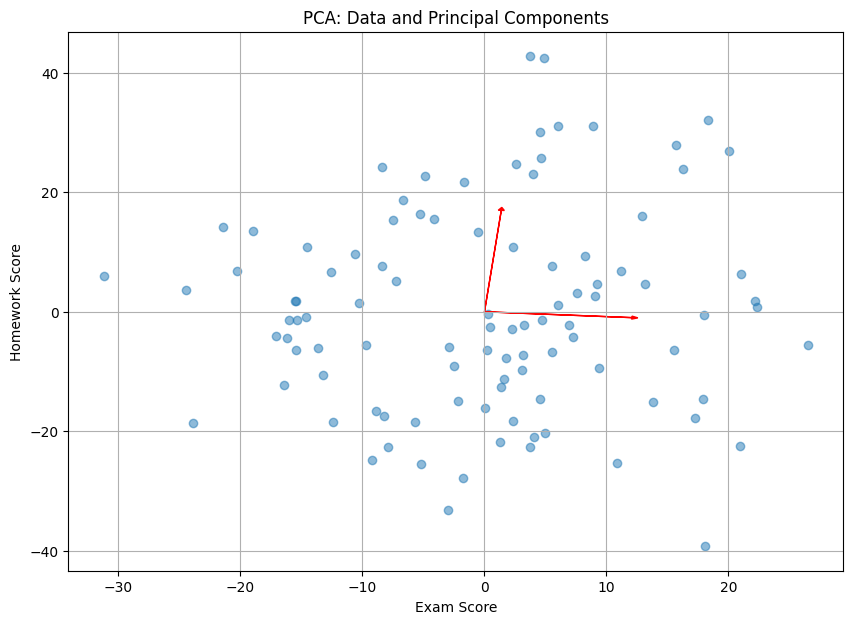

In [13]:
#will use pandas
import pandas as pd

# Number of students
num_students = 100

# Generate random data for Exam Score, Homework Score, and Class Participation
# Mean and standard deviation chosen arbitrarily for each variable
exam_scores = np.random.normal(80, 13, num_students)
homework_scores = np.random.normal(75, 18, num_students)
participation_scores = np.random.normal(95, 3, num_students)

# Combine into a data matrix (p=3 variables, N=num_students)
X = np.vstack([exam_scores, homework_scores, participation_scores]).T

# now convert the data matrix into a pandas DataFrame (df) for easier visualization
df = pd.DataFrame(X, columns=['Exam Score', 'Homework Score', 'Participation'])

# Step 1: Compute the sample mean M of the observation vectors
mean_vector = np.mean(X, axis=0)

# Step 2: Center the data (mean-deviation form)
X_centered = X - mean_vector  # Subtract mean from each column

# Step 3: Compute the covariance matrix S
N = X.shape[0]
# S = (1/N-1) B B^T
cov_matrix = (1 / (N - 1)) * (X_centered.T @ X_centered)

# Step 4: compute the eigenvalues and eigenvectors for
# Principle Component Analysis
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Total variance (which is the trace of the covariance matrix)
total_variance = np.trace(cov_matrix)

# will now consider the top 2 components, explain their variance
k = 2
variance_explained = np.sum(eigenvalues[:k]) / total_variance * 100

# will now print the respective covariance matrix and relevant results
print("Covariance Matrix (S):\n", cov_matrix)
print("\nTotal variance (trace of S):", total_variance)
print(f"\nEigenvalues: {eigenvalues}")
print(f"Top {k} principal components explain {variance_explained:.2f}% of the variance.")

# can also view the data in mean-deviation form (first 5 rows)
print("\nData (mean-deviation form):\n", X_centered[:5])

# will now plot the data and principal components for a visual
# understanding of whats going on
plt.figure(figsize=(10, 7))

# create acatter plot of the data
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5)

# will now plot the principal components
for i in range(k):
    plt.arrow(0, 0, eigenvectors[0, i] * np.sqrt(eigenvalues[i]), eigenvectors[1, i] * np.sqrt(eigenvalues[i]),
              head_width=0.5, head_length=0.5, fc='red', ec='red')

plt.xlabel('Exam Score')
plt.ylabel('Homework Score')
plt.title('PCA: Data and Principal Components')
plt.grid(True)
plt.show()
